# はじめに
`nbconvert` と `nbextensions/printview` を組み合わせることで、Notebookからボタン1つで日本語を含むPDFを出力できます。

# 適当なコードサンプル
データは、[全国市販酒類調査の結果をもとにした疑似日本酒データセット](https://github.com/ltl-manabi/R/tree/master/pseudo_sake_data)を使います。

## ライブラリの読み込み

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from dtreeplt import dtreeplt

## データの読み込み

In [2]:
df = pd.read_csv('./pseudo_sake_data.csv')
df.head()

,タイプ,アルコール分,日本酒度,エキス分,総酸,アミノ酸度,甘辛度,濃淡度
0,一般酒,15.680,4.020,5.705,1.028,0.990,-0.075,-1.073
1,一般酒,15.640,0.101,3.912,1.346,0.664,0.192,-1.004
2,一般酒,14.918,-3.606,4.576,1.056,1.789,-0.397,-0.949
3,一般酒,16.587,3.973,4.211,1.041,1.637,0.146,-1.048
4,一般酒,14.544,6.073,3.365,0.894,1.024,-0.313,-0.863


## データの分布を可視化する

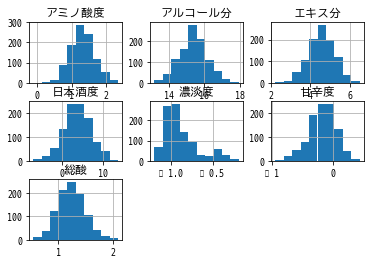

In [3]:
df.hist();

## 決定木で「タイプ」を判定するモデルを作る

In [4]:
le = LabelEncoder()
le.fit(df['タイプ'])
df['タイプ'] = le.transform(df['タイプ'])
le.classes_

array(['一般酒', '吟醸酒', '本醸造酒', '純米酒'], dtype=object)

In [5]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [6]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

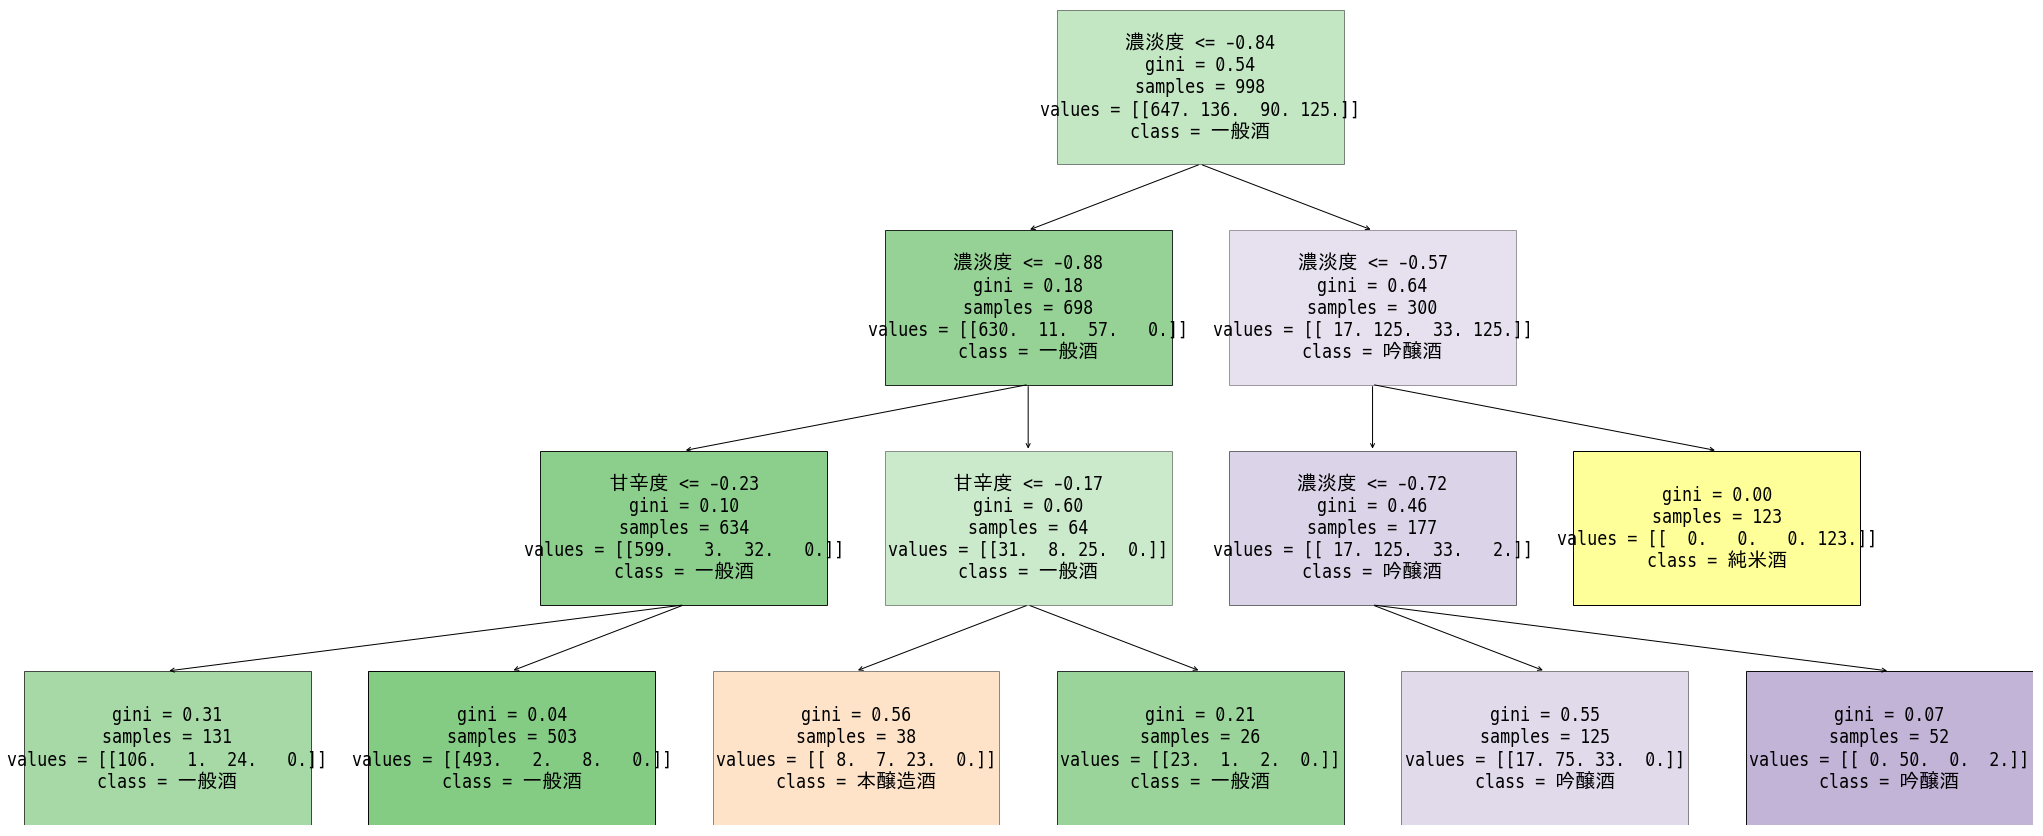

In [7]:
dtree = dtreeplt(
    model=clf,
    feature_names=df.iloc[:, 1:].columns,
    target_names=le.classes_
)
fig = dtree.view()